# Comparison of Low-Resolution Cicle3 arxiv

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Comparison of Histograms](#2-comparison-of-histograms)

4. [Tropical Mean Comparison](#3-mean-comparison)

5. [The bias between models and observations](#4-calculation-of-a-bias-between-climatological-model-and-observations)

[Go to the end of file](#the-end)

#

## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
print('aqua is loaded')
sys.path.insert(0, '../../')
from tropical_rainfall import Tropical_Rainfall
print('diagnostic is loaded')

aqua is loaded
diagnostic is loaded


##### Loading the low-resolution arxiv 

#### ICON, ngc3028, lra

In [3]:
24*60*60

86400

In [2]:
reader          = Reader(model="ICON", exp="ngc3028", source="lra-r100-monthly")
icon_ngc3028    = reader.retrieve()
icon_ngc3028    = icon_ngc3028['tprate'][:]*86400
icon_ngc3028.attrs['units'] = "mm/day"

/work/bb1153/b382267/mamba_dir/mambaforge/envs/tropical-rainfall_m/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/work/bb1153/b382267/mamba_dir/mambaforge/envs/tropical-rainfall_m/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chu

In [35]:
#icon_ngc3028 = icon_ngc3028.isel(time=slice(1, -1))
#ifs_tco2559_ng5 = ifs_tco2559_ng5.isel(time=slice(1, -1))
#ifs_tco1279_orca025 = ifs_tco1279_orca025.isel(time=slice(1, -1))

#### IFS, tco2559-ng5, lra

In [76]:
reader              = Reader(model="IFS", exp="tco2559-ng5-cycle3", source="lra-r100-monthly") 
ifs_tco2559_ng5     = reader.retrieve()
ifs_tco2559_ng5     = ifs_tco2559_ng5['tprate'][:]*86400 
ifs_tco2559_ng5.attrs['units'] = "mm/day"


#### IFS, tco1279-orca025-cycle3, lra

In [77]:
reader                  = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="lra-r100-monthly")
ifs_tco1279_orca025     = reader.retrieve()
ifs_tco1279_orca025     = ifs_tco1279_orca025['tprate'][:]*86400
ifs_tco1279_orca025.attrs['units'] = "mm/day"

In [ ]:
ifs_tco1279_orca025.time

In [78]:
ifs_tco1279_orca025 = ifs_tco1279_orca025.dropna(dim='time')

In [ ]:
ifs_tco1279_orca025.time

#### MSWEP, monthly 

In [79]:
reader                  = Reader(model="MSWEP", exp="past", source="monthly", regrid = "r100")
mswep_mon               = reader.retrieve(regrid=True)
mswep_mon               = mswep_mon['tprate'][:]*86400
mswep_mon.attrs['units'] = "mm/day"
mswep_mon = mswep_mon.reindex(lat=list(reversed(mswep_mon.lat)))

### Initialization of the tropical-rainfall diagnostic

The class attributes are:
- The latitude band of the tropical area: **trop_lat=15**     
    
- The number of bins in the histogram: **num_of_bins=20**
    
- The left edge of the first bin: **first_edge=0** 
    
- The width of each bin: **width_of_bin**     
    

In [3]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = int(1000/1), first_edge = 0, width_of_bin = 1, loglevel='debug')

## 2. Comparison of histograms

##### All output of the diagnostic is in the format of NetCDF or PDF.
##### The paths to the repositories, where the diagnostic store the output, are 

In [3]:
# Please change the path to the NetCDF files and the PDF files to your own path

path_to_netcdf = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/"
path_to_pdf    = "/work/bb1153/b382267/tropical_rainfall_cicle3/PDF/"

#### The function `histogram` calculates and stores the histograms in a specified repository. 

In [82]:
hist_icon_ngc3028 = diag.histogram(icon_ngc3028, path_to_histogram=path_to_netcdf, name_of_file="icon_ngc3028_lra_r100_monthly")

2023-07-14 17:27:18 :: Trop. Rainfall :: INFO     -> Histogram of the data is created
2023-07-14 17:27:18 :: Trop. Rainfall :: DEBUG    -> Size of data after preprocessing/Sum of Counts: 723600/723600
2023-07-14 17:27:18 :: Trop. Rainfall :: DEBUG    -> The difference between the mean of the data and the mean of the histogram: -1.7843%
2023-07-14 17:27:18 :: Trop. Rainfall :: DEBUG    -> The mean of the data: 5.048296317594627mm/day
2023-07-14 17:27:18 :: Trop. Rainfall :: DEBUG    -> The mean of the histogram: 5.138374792703151mm/day
2023-07-14 17:27:19 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


In [83]:
hist_ifs_tco2559_ng5 = diag.histogram(ifs_tco2559_ng5, path_to_histogram=path_to_netcdf, name_of_file="ifs_tco2559_ng5_lra_r100_monthly")

2023-07-14 17:27:20 :: Trop. Rainfall :: INFO     -> Histogram of the data is created
2023-07-14 17:27:20 :: Trop. Rainfall :: DEBUG    -> Size of data after preprocessing/Sum of Counts: 648000/648000
2023-07-14 17:27:21 :: Trop. Rainfall :: DEBUG    -> The difference between the mean of the data and the mean of the histogram: -1.2955%
2023-07-14 17:27:21 :: Trop. Rainfall :: DEBUG    -> The mean of the data: 4.8949332674012265mm/day
2023-07-14 17:27:21 :: Trop. Rainfall :: DEBUG    -> The mean of the histogram: 4.9583456790123455mm/day
2023-07-14 17:27:21 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


In [84]:
hist_ifs_tco1279_orca025 = diag.histogram(ifs_tco1279_orca025, path_to_histogram=path_to_netcdf, name_of_file="ifs_tco2559_ng5_lra_r100_monthly")

2023-07-14 17:27:23 :: Trop. Rainfall :: INFO     -> Histogram of the data is created
2023-07-14 17:27:23 :: Trop. Rainfall :: DEBUG    -> Size of data after preprocessing/Sum of Counts: 648000/648000
2023-07-14 17:27:24 :: Trop. Rainfall :: DEBUG    -> The difference between the mean of the data and the mean of the histogram: -1.1094%
2023-07-14 17:27:24 :: Trop. Rainfall :: DEBUG    -> The mean of the data: 4.963588861323127mm/day
2023-07-14 17:27:24 :: Trop. Rainfall :: DEBUG    -> The mean of the histogram: 5.018652777777778mm/day
2023-07-14 17:27:24 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


In [85]:
hist_mswep_mon = diag.histogram(mswep_mon, path_to_histogram=path_to_netcdf, name_of_file="mswep_past_monthly_r100")

2023-07-14 17:27:41 :: Trop. Rainfall :: INFO     -> Histogram of the data is created
2023-07-14 17:27:41 :: Trop. Rainfall :: DEBUG    -> Size of data after preprocessing/Sum of Counts: 5421600/5421600
2023-07-14 17:28:09 :: Trop. Rainfall :: DEBUG    -> The difference between the mean of the data and the mean of the histogram: -0.8774%
2023-07-14 17:28:09 :: Trop. Rainfall :: DEBUG    -> The mean of the data: 4.565590842203865mm/day
2023-07-14 17:28:09 :: Trop. Rainfall :: DEBUG    -> The mean of the histogram: 4.605648148148148mm/day
2023-07-14 17:28:10 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


In [29]:
hist_mswep_mon.attrs

{'units': 'mm/day',
 'regridded': 1,
 'history': '2023-07-13 20:15:33 variable renamed by AQUA fixer;\n2023-07-13 20:15:33 units changed by AQUA fixer;\n2023-07-13 20:36:36 histogram is calculated for time_band: [1979-02-01T00:00:00.000000000, 2020-11-01T00:00:00.000000000, freq=M]; lat_band: [-14.5, 14.5, freq=1.0]; lon_band: [0.0, 359.0, freq=1.0];\n ',
 'paramId': '260048',
 'long_name': 'Total precipitation rate',
 'cfVarName': 'tprate',
 'shortName': 'tprate',
 'factor': 3.802570537683474e-07,
 'offset': 0,
 'src_units': 'mm month-1',
 'units_fixed': 1,
 'mean_of_original_data': 4.565590842203865,
 'mean_of_histogram': 4.605648148148148,
 'relative_discrepancy': -0.8773739769669573}

##### The diagnostic can provide us with a graphical comparison of the obtained histograms.  
##### Below we compare the precipitation pdf with the units `mm/day`. Units of precipitation: mm  day**-1

2023-07-14 17:32:21 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/PDF/ already exists


{<Axes: title={'center': 'Monthly, 1 degree res (100km)'}, xlabel='Precipitation, [mm/day]', ylabel='PDF'>,
 <Figure size 800x500 with 1 Axes>}

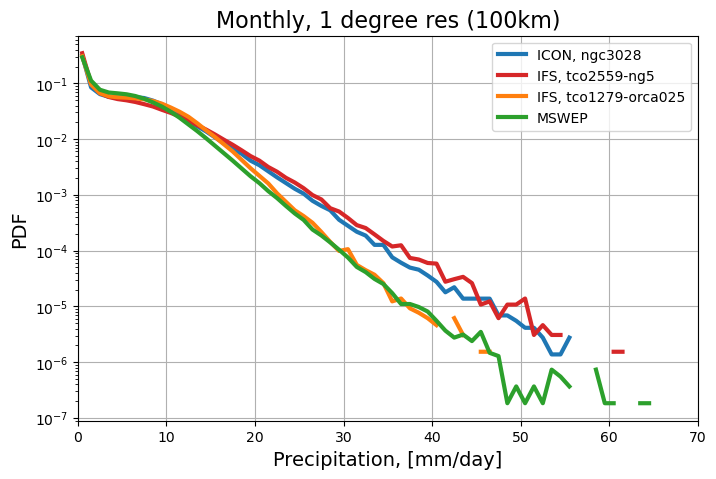

In [90]:
add = diag.histogram_plot(hist_icon_ngc3028,    figsize=1, 
                new_unit="mm/day",
                legend='ICON, ngc3028')
diag.histogram_plot(hist_ifs_tco2559_ng5,       add = add,  color ='tab:red', 
                new_unit="mm/day",
                legend='IFS, tco2559-ng5') 
diag.histogram_plot(hist_ifs_tco1279_orca025,   add = add,  color ='tab:orange', 
                new_unit="mm/day",
                legend='IFS, tco1279-orca025') 
diag.histogram_plot(hist_mswep_mon,             add = add,  color ='tab:green', 
                new_unit="mm/day",
                legend='MSWEP', xmax = 70, 
                plot_title='Monthly, 1 degree res (100km)', loc='upper right',
                path_to_pdf=path_to_pdf, 
                pdf_format=False, 
                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison')

## 3. Mean comparison

##### The diagnostic can also give us a graphical comparison of the mean value along different coordinates. 

For example, the function `mean_and_median_plot()` calculates the mean value of precipitation during 
 - December-January-February (`DJF`), 
 - March-April-May (`MAM`), 
 - June-July-August (`JJA`), 
 - September-October-November (`SON`), and 
- for the total period of time. 

Then the function  `mean_and_median_plot(coord='lon')` calculates the mean value of precipitation along the longitude. 

In the end, the mean values of precipitation for each value of latitude in millimeters per day are:

2023-07-14 17:33:31 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/PDF/ already exists


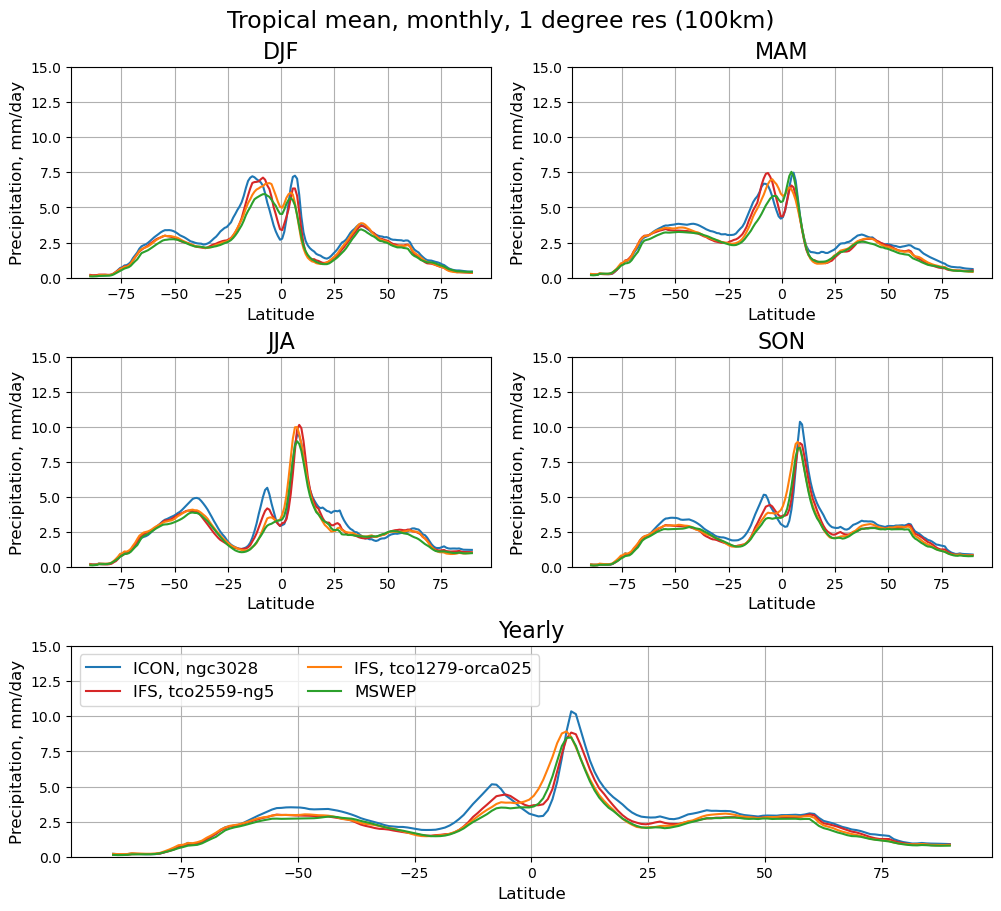

In [91]:
coord = 'lon'
diag.trop_lat=90
add = diag.mean_and_median_plot(icon_ngc3028,                   coord=coord,  
                                legend='ICON, ngc3028',         color='tab:blue', figsize=0.9,      new_unit = 'mm/day' )

add = diag.mean_and_median_plot(ifs_tco2559_ng5,    fig=add,    coord=coord,  
                                legend='IFS, tco2559-ng5',      color='tab:red',                    new_unit = 'mm/day')

add = diag.mean_and_median_plot(ifs_tco1279_orca025,fig=add,    coord=coord,  
                                legend='IFS, tco1279-orca025', color='tab:orange',                  new_unit = 'mm/day')

add = diag.mean_and_median_plot(mswep_mon,          fig=add,    coord=coord,  
                                legend='MSWEP',                 color='tab:green',                  new_unit = 'mm/day',
                                plot_title='Tropical mean, monthly, 1 degree res (100km)', loc='upper left',
                                path_to_pdf=path_to_pdf,
                                pdf_format=False,
                                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison_along_lat')

The function `mean_and_median_plot(coord='lat')` calculates the mean precipitation value for each season (`DJF`, `MAM`, `JJA`, `SON` and for all period of time) and along the tropical area. 

The mean values of tropical precipitation for each value of longitude in millimeters per day are:

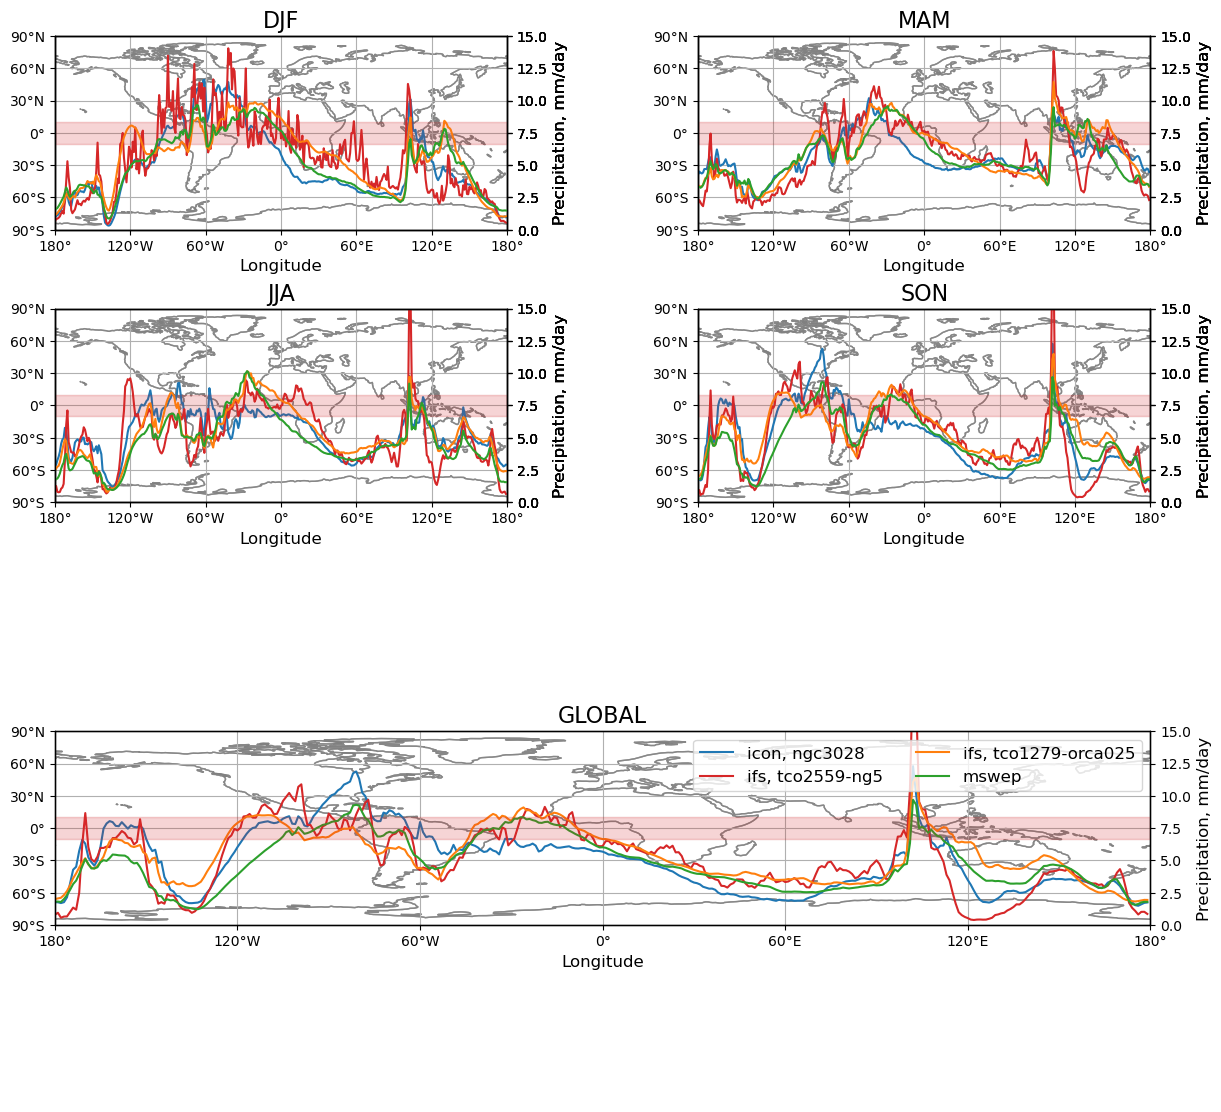

In [36]:
coord = 'lat'
diag.trop_lat=10
add = diag.mean_and_median_plot(icon_ngc3028,                   coord=coord,  
                                legend='icon, ngc3028',         color='tab:blue', figsize=1.1,      new_unit = 'mm/day' )

add = diag.mean_and_median_plot(ifs_tco2559_ng5,    fig=add,    coord=coord,  
                                legend='ifs, tco2559-ng5',      color='tab:red',                    new_unit = 'mm/day')

add = diag.mean_and_median_plot(ifs_tco1279_orca025,fig=add,    coord=coord,  
                                legend='ifs, tco1279-orca025', color='tab:orange',                  new_unit = 'mm/day')

add = diag.mean_and_median_plot(mswep_mon,          fig=add,    coord=coord,  
                                legend='mswep',                 color='tab:green',                  new_unit = 'mm/day')
                                #plot_title='Tropical mean, monthly, 1 degree res (100km)', loc='upper center',
                                #path_to_pdf=path_to_pdf, 
                                #name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison_along_lon')

## 4. Calculation of a bias between climatological model and observations

Tropical-rainfall diagnostic provides the graphical representation of the bias between the mean value of precipitation of the climatological model and the mean value of observations. 

The mean value the function calculates for each season (`DJF`, `MAM`, `JJA`, `SON`) and for the total period of time. 

2023-07-14 01:35:32 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/PDF/ already exists


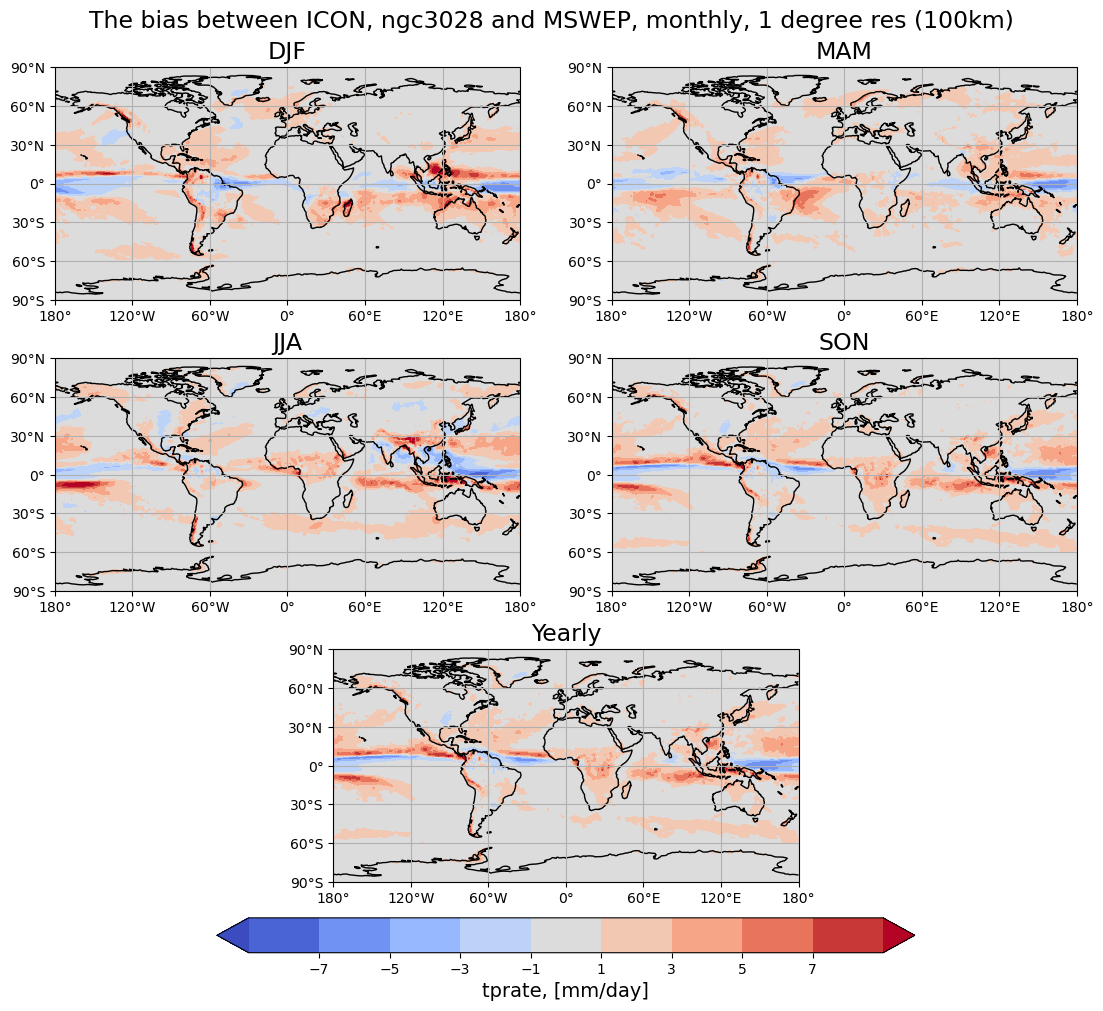

In [14]:
diag.plot_bias(icon_ngc3028, dataset_2 = mswep_mon, seasons=True, new_unit='mm/day',  trop_lat=90,  vmin=-9, vmax=11,
               plot_title='The bias between ICON, ngc3028 and MSWEP, monthly, 1 degree res (100km)',
               path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_mswep_lra_r100_monthly_bias')

2023-07-14 17:32:17 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/PDF/ already exists


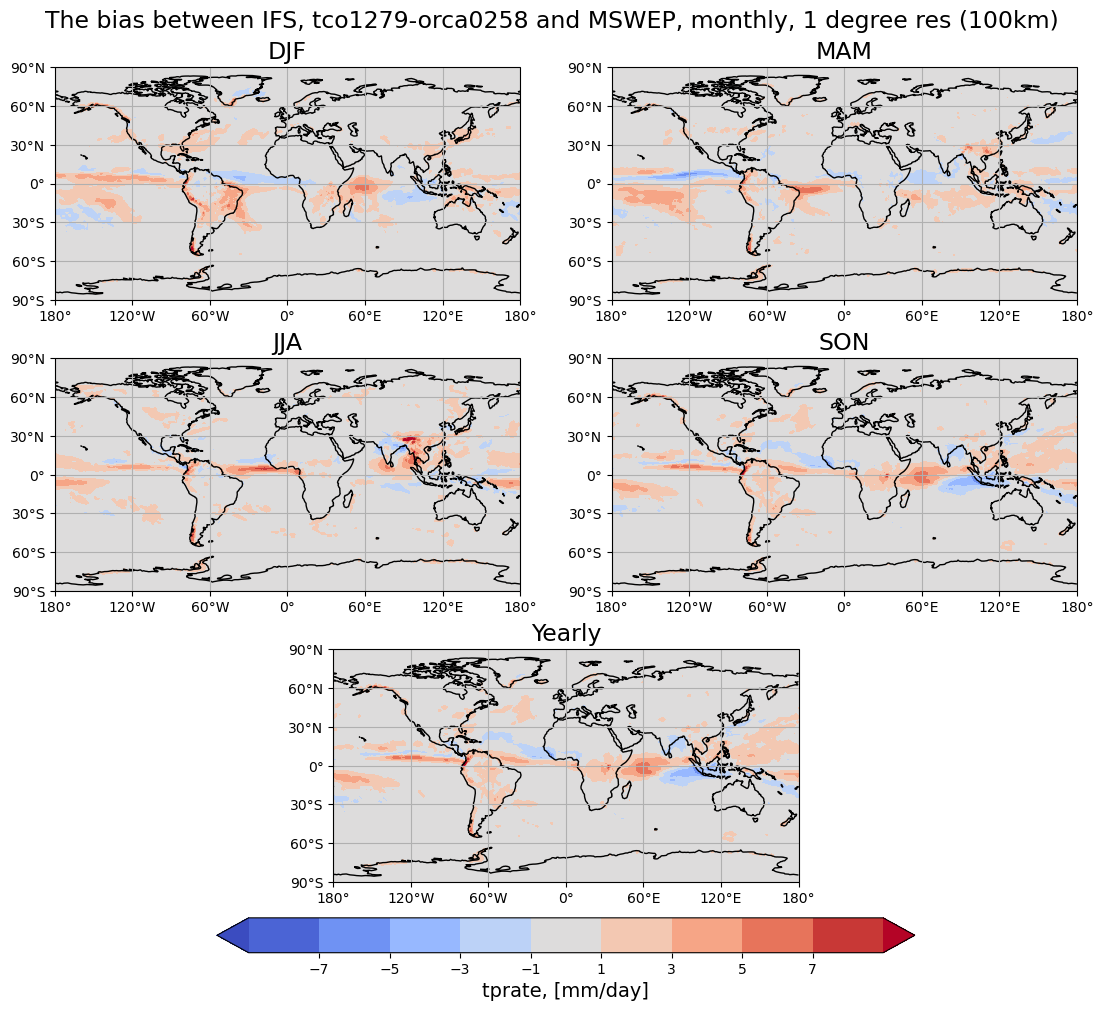

In [89]:
diag.plot_bias(ifs_tco1279_orca025, dataset_2 = mswep_mon, seasons=True, new_unit='mm/day',  trop_lat=90,  vmin=-9, vmax=11,
               plot_title='The bias between IFS, tco1279-orca0258 and MSWEP, monthly, 1 degree res (100km)',
               path_to_pdf=path_to_pdf, name_of_file='ifs_tco1279_orca0258_mswep_lra_r100_monthly_bias')

2023-07-14 17:30:54 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/PDF/ already exists


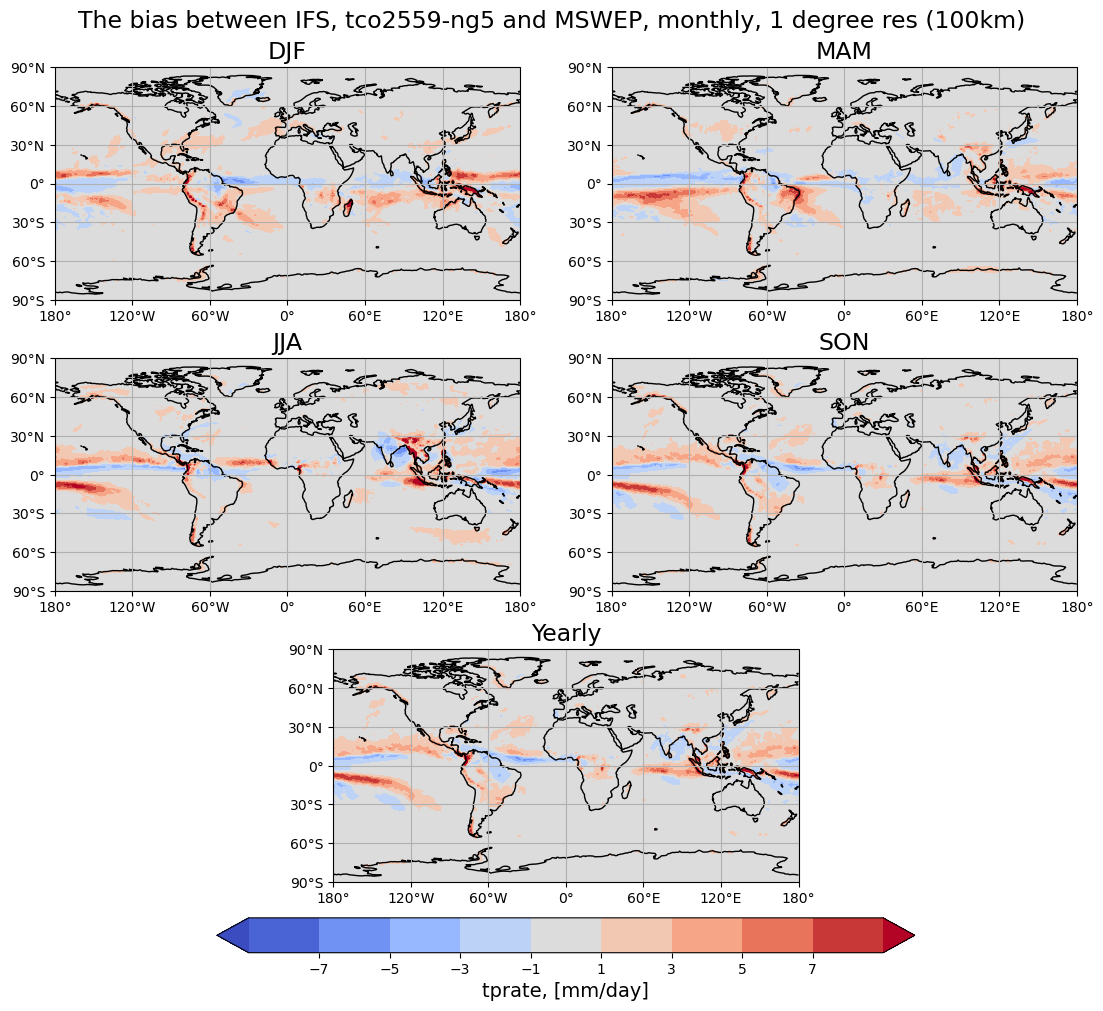

In [88]:
diag.plot_bias(ifs_tco2559_ng5, dataset_2 = mswep_mon, seasons=True, new_unit='mm/day',  trop_lat=90,  vmin=-9, vmax=11,
               plot_title='The bias between IFS, tco2559-ng5 and MSWEP, monthly, 1 degree res (100km)',
               path_to_pdf=path_to_pdf, name_of_file='tco2559-ng5_mswep_lra_r100_monthly_bias')

#

In [3]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = int(1000/1), first_edge = 0, width_of_bin = 1, loglevel='debug')

In [5]:
path_to_ifs='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/tco2559-ng5-cycle3/'
hist_ifs_2559_high = diag.merge_list_of_histograms(path_to_histograms = path_to_ifs, multi = None, seasons = False, all = True)

In [6]:
path_to_ifs_orca='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/tco1279-orca025-cycle3/'
hist_ifs_tco1279_high = diag.merge_list_of_histograms(path_to_histograms = path_to_ifs_orca, multi = None, seasons = False, all = True)

In [7]:
path_to_icon='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/PT3H/'
hist_icon_ngc3028_high = diag.merge_list_of_histograms(path_to_histograms = path_to_icon, multi = None,  all = True)

In [29]:
path_to_mswep='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/mswep_no_fix/'
hist_mswep_high = diag.merge_list_of_histograms(path_to_histograms = path_to_mswep, multi = None,  all = True)

In [ ]:
hist_mswep_high

In [ ]:
hist_ifs_tco1279_high.counts.attrs

In [4]:
path_to_icon='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/tco2559-ng5-cycle3/trop_rainfall_ifs_tco1279_ng5_3hourly_2D_1h_native_r010_3h_2020-01-20T00_2020-02-29T21_histogram.nc'
ds_1 = diag.open_dataset(path_to_netcdf = path_to_icon)
ds_1.counts.size_of_the_data

path_to_icon='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/tco2559-ng5-cycle3/trop_rainfall_ifs_tco1279_ng5_3hourly_2D_1h_native_r010_3h_2020-03-01T00_2020-04-30T21_histogram.nc'
ds_2 = diag.open_dataset(path_to_netcdf = path_to_icon)
print(ds_1.counts.size_of_the_data+ ds_2.counts.size_of_the_data)

ds_3 = diag.merge_two_datasets(ds_1, ds_2)
ds_3.counts.size_of_the_data

881280000


881280000

In [6]:
ds_3.counts.attrs['size_of_the_data'] = ds_1.counts.size_of_the_data+ ds_2.counts.size_of_the_data
ds_3.counts.size_of_the_data

881280000

In [ ]:
diag.histogram_plot(hist_mswep_high,          pdf=True,   color ='tab:green', 
                legend='MSWEP') 

In [27]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(hist_ifs_tco1279_high.center_of_bin, hist_ifs_tco1279_high.pdf)
plt.yscale('log')

In [ ]:
add = diag.histogram_plot(hist_ifs_tco1279_high,   pdf=True,   figsize=1,                         
                legend='ICON, ngc3028')
#add = diag.histogram_plot(hist_mswep_high,          pdf=True,   add = add,  color ='tab:green', 
#                legend='MSWEP') ,  # xmax = 70,)

In [ ]:
hist_icon_ngc3028_high

In [11]:
hist_icon_ngc3028_high.counts.size_of_the_data

15093000000

In [13]:
int(hist_icon_ngc3028_high.counts.sum()) - 15093000000

-212576

In [24]:
for hist in [hist_ifs_2559_high, hist_ifs_tco1279_high, hist_icon_ngc3028_high, hist_mswep_high]:
    if abs(hist.pdf.sum() -1) < 10**(-4) and  abs(hist.frequency.sum() -1) < 10**(-4):
        print('OK')

OK
OK
OK
OK


<xarray.DataArray 'frequency' ()>
array(True)
Attributes: (12/18)
    cell_methods:           time: mean
    component:              atmo
    grid_mapping:           crs
    long_name:              Total precipitation rate
    units:                  kg m**-2 s**-1
    vgrid:                  surface
    ...                     ...
    time_band:              2024-11-01T00:00:00.000000000, 2024-12-31T21:00:0...
    lat_band:               -14.95, 14.95, freq=0.09999999999999964
    lon_band:               0.0, 359.9, freq=0.1
    mean_of_original_data:  5.151797800349313
    mean_of_histogram:      5.5476647474575
    relative_discrepancy:   -7.432319848617475;\n -7.278907680401142;\n -7.09...

In [10]:
path_to_pdf    = "/work/bb1153/b382267/tropical_rainfall_cicle3/PDF/"

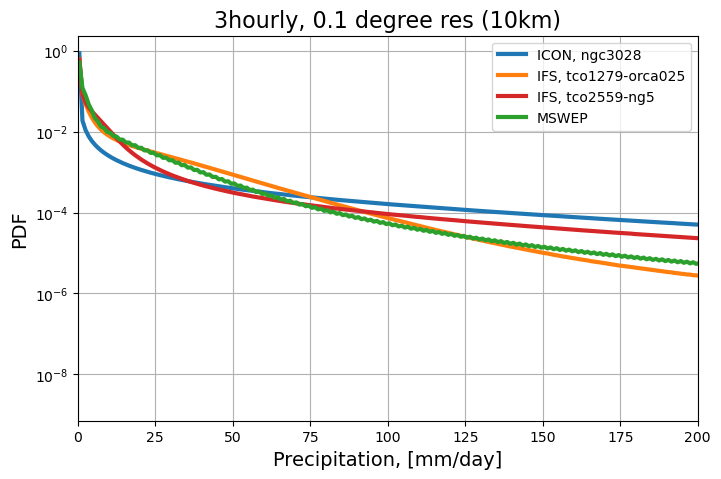

In [28]:
add = diag.histogram_plot(hist_icon_ngc3028_high,   pdf=True,   figsize=1,                         
                legend='ICON, ngc3028')
add = diag.histogram_plot(hist_ifs_tco1279_high.pdf,    pdf=False, frequency=False,   add = add,  color ='tab:orange', 
                legend='IFS, tco1279-orca025') 
add = diag.histogram_plot(hist_ifs_2559_high,       pdf=True,   add = add,  color ='tab:red', 
                legend='IFS, tco2559-ng5') 
add = diag.histogram_plot(hist_mswep_high,          pdf=True,   add = add,  color ='tab:green', 
                legend='MSWEP',  # xmax = 70, 
                plot_title='3hourly, 0.1 degree res (10km)', loc='upper right',
                pdf_format=False,  xmax=200)

2023-07-14 20:49:50 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/PDF/ already exists


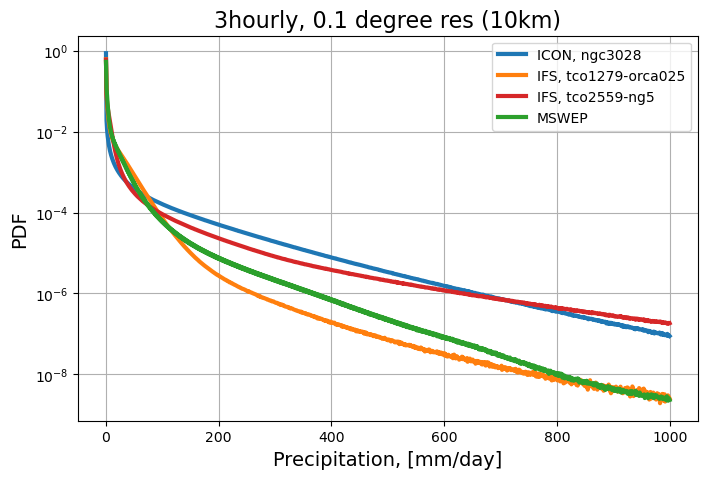

In [31]:
add = diag.histogram_plot(hist_icon_ngc3028_high,   pdf=True,   figsize=1,                         
                legend='ICON, ngc3028')
add = diag.histogram_plot(hist_ifs_tco1279_high.pdf,    pdf=False, frequency=False,   add = add,  color ='tab:orange', 
                legend='IFS, tco1279-orca025') 
add = diag.histogram_plot(hist_ifs_2559_high,       pdf=True,   add = add,  color ='tab:red', 
                legend='IFS, tco2559-ng5') 
add = diag.histogram_plot(hist_mswep_high,          pdf=True,   add = add,  color ='tab:green', 
                legend='MSWEP',  # xmax = 70, 
                plot_title='3hourly, 0.1 degree res (10km)', loc='upper right',
                path_to_pdf=path_to_pdf, 
                pdf_format=False,  
                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_10km_3h')

2023-07-14 19:07:06 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/PDF/ already exists


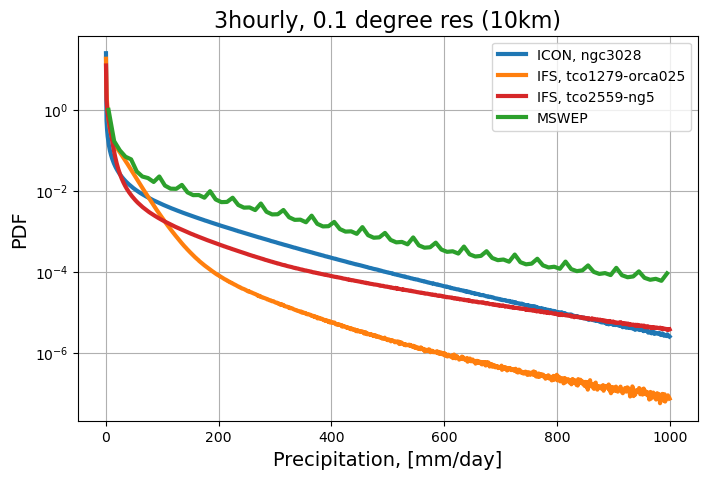

##### The end

In [58]:
mswep_retrieved['tprate']

<xarray.DataArray 'tprate' (time: 122718, lat: 1800, lon: 3600)>
dask.array<mul, shape=(122718, 1800, 3600), dtype=float32, chunksize=(46, 113, 225), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 179.9
  * time     (time) datetime64[ns] 1979-01-01T09:00:00 ... 2020-12-31
Attributes:
    units:        kg m**-2 s**-1
    history:      2023-07-14 19:35:29 variable renamed by AQUA fixer;\n2023-0...
    paramId:      260048
    long_name:    Total precipitation rate
    cfVarName:    tprate
    shortName:    tprate
    factor:       0.0008333333333333334
    offset:       0
    src_units:    mm 3h-1
    units_fixed:  1

In [59]:
reader              = Reader(model="MSWEP", exp="past", source="3hourly")
mswep_retrieved     = reader.retrieve(fix=False)
#mswep_retrieved     = mswep_retrieved ['tprate'][:]*86400

In [61]:
mswep_retrieved['precipitation']

<xarray.DataArray 'precipitation' (time: 122718, lat: 1800, lon: 3600)>
dask.array<concatenate, shape=(122718, 1800, 3600), dtype=float32, chunksize=(46, 113, 225), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 179.9
  * time     (time) datetime64[ns] 1979-01-01T09:00:00 ... 2020-12-31
Attributes:
    units:    mm 3h-1

In [67]:
mswep_10 = mswep_retrieved['precipitation'].isel(time=100).values

In [48]:
import numpy as np

In [55]:
reader.fldmean(mswep_retrieved.isel(time=100)).values

array(24.41258567)

In [68]:
np.unique(mswep_10)

array([ 0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,  0.3125,  0.375 ,
        0.4375,  0.5   ,  0.5625,  0.625 ,  0.6875,  0.75  ,  0.8125,
        0.875 ,  0.9375,  1.    ,  1.0625,  1.125 ,  1.1875,  1.25  ,
        1.3125,  1.375 ,  1.4375,  1.5   ,  1.5625,  1.625 ,  1.6875,
        1.75  ,  1.8125,  1.875 ,  1.9375,  2.    ,  2.0625,  2.125 ,
        2.1875,  2.25  ,  2.3125,  2.375 ,  2.4375,  2.5   ,  2.5625,
        2.625 ,  2.6875,  2.75  ,  2.8125,  2.875 ,  2.9375,  3.    ,
        3.0625,  3.125 ,  3.1875,  3.25  ,  3.3125,  3.375 ,  3.4375,
        3.5   ,  3.5625,  3.625 ,  3.6875,  3.75  ,  3.8125,  3.875 ,
        3.9375,  4.    ,  4.0625,  4.125 ,  4.1875,  4.25  ,  4.3125,
        4.375 ,  4.4375,  4.5   ,  4.5625,  4.625 ,  4.6875,  4.75  ,
        4.8125,  4.875 ,  4.9375,  5.    ,  5.0625,  5.125 ,  5.1875,
        5.25  ,  5.3125,  5.375 ,  5.4375,  5.5   ,  5.5625,  5.625 ,
        5.6875,  5.75  ,  5.8125,  5.875 ,  5.9375,  6.    ,  6.0625,
        6.125 ,  6.1